In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 8

In [2]:
data = loadmat("../data/ex8faces.mat")
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [3]:
dataset = data['X']
print(dataset.shape)

(5000, 1024)


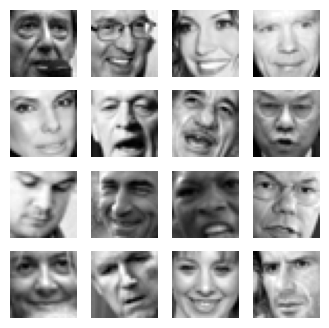

In [4]:
def display_faces(data, num_images):
    """随机显示num_images张人脸图像"""
    sample_indices = np.random.choice(data.shape[0], num_images, replace=False)
    sample_images = data[sample_indices, :]
    
    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for i, ax in enumerate(axes.flatten()):
        face_matrix = sample_images[i].reshape(32, 32).T  # 将向量重塑为32x32的矩阵，并转置
        ax.imshow(face_matrix, cmap='gray')
        ax.axis('off')
    plt.show()

display_faces(dataset, 16)

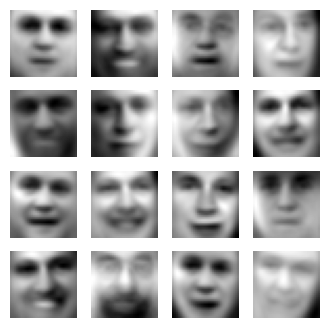

In [5]:
from sklearn.decomposition import PCA

def apply_pca_and_reconstruct(data, n_components=16):
    """应用PCA并使用指定数量的主成分重建数据"""
    pca = PCA(n_components=n_components)
    pca.fit(data)
    transformed_data = pca.transform(data)
    reconstructed_data = pca.inverse_transform(transformed_data)
    return reconstructed_data

# 使用示例数据集进行PCA处理并重建数据
reconstructed_dataset = apply_pca_and_reconstruct(dataset)

# 显示重建的结果（取前16张进行展示）
display_faces(reconstructed_dataset, 16)